# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Datasets as DS
import NeuroDAVIS as nd
import DownstreamAnalysis as DA
from D2toD9 import Convert
from sklearn.metrics.pairwise import euclidean_distances

# Loading data

In [2]:
dir = 'D:/Research/NeuroDAVIS/Results/2D/NeuroDAVIS/'
X,y = DS.LoadData('EllipticRings')

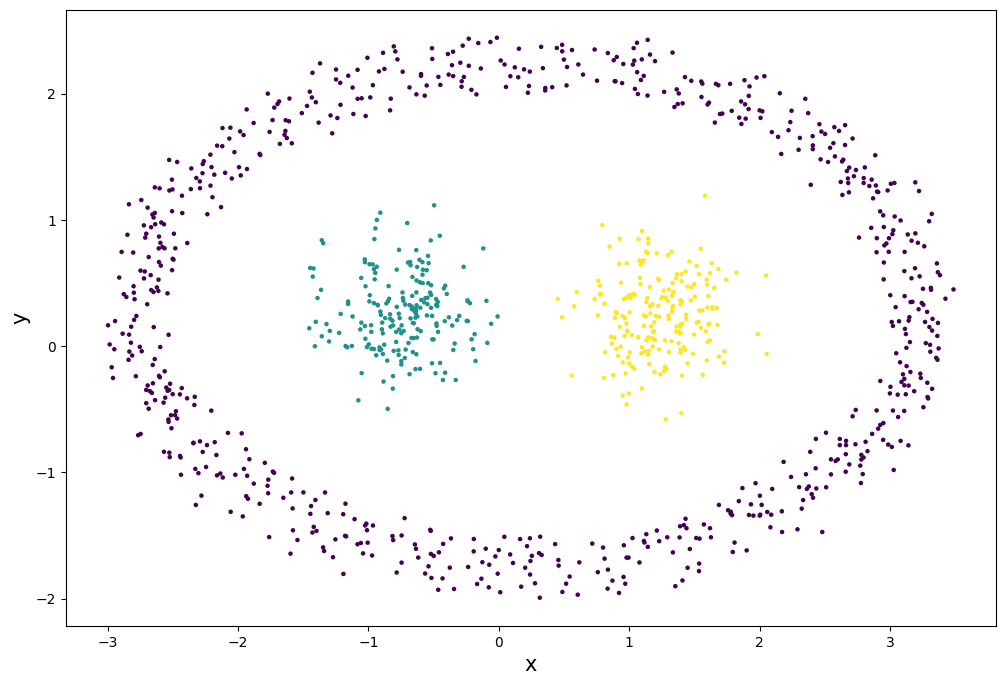

In [3]:
plt.figure(figsize=(12,8))
plt.scatter(X[:,0],X[:,1],c=y,s=5)
plt.xlabel("x", fontsize=15)
plt.ylabel("y", fontsize=15)
#plt.show()
plt.savefig(dir+'EllipticRing.eps', dpi = 1200, format = 'eps')

# Applying NeuroDAVIS

In [4]:
data = np.eye(X.shape[0])
neuroDAVIS, Low = nd.NeuroDAVIS(data, X, dim=2, lambda_act=0.0001, lambda_weight=0.001, num_neuron=[10,6], bs=16, epoch=1000, sd=1, verbose=1)
X_embedding = Low.predict(data)

Epoch 1/1000
69/69 [==============================] - 1s 1ms/step - loss: 2.3398
Epoch 2/1000
69/69 [==============================] - 0s 1ms/step - loss: 2.3012
Epoch 3/1000
69/69 [==============================] - 0s 1ms/step - loss: 2.2605
Epoch 4/1000
69/69 [==============================] - 0s 1ms/step - loss: 2.1912
Epoch 5/1000
69/69 [==============================] - 0s 1ms/step - loss: 2.0615
Epoch 6/1000
69/69 [==============================] - 0s 1ms/step - loss: 1.8714
Epoch 7/1000
69/69 [==============================] - 0s 1ms/step - loss: 1.6468
Epoch 8/1000
69/69 [==============================] - 0s 1ms/step - loss: 1.3881
Epoch 9/1000
69/69 [==============================] - 0s 1ms/step - loss: 1.1111
Epoch 10/1000
69/69 [==============================] - 0s 1ms/step - loss: 0.8400
Epoch 11/1000
69/69 [==============================] - 0s 1ms/step - loss: 0.6093
Epoch 12/1000
69/69 [==============================] - 0s 1ms/step - loss: 0.4447
Epoch 13/1000
69/69 [====

Epoch 101/1000
69/69 [==============================] - 0s 1ms/step - loss: 0.0452
Epoch 102/1000
69/69 [==============================] - 0s 1ms/step - loss: 0.0450
Epoch 103/1000
69/69 [==============================] - 0s 1ms/step - loss: 0.0444
Epoch 104/1000
69/69 [==============================] - 0s 1ms/step - loss: 0.0442
Epoch 105/1000
69/69 [==============================] - 0s 1ms/step - loss: 0.0441
Epoch 106/1000
69/69 [==============================] - 0s 1ms/step - loss: 0.0444
Epoch 107/1000
69/69 [==============================] - 0s 1ms/step - loss: 0.0443
Epoch 108/1000
69/69 [==============================] - 0s 1ms/step - loss: 0.0441
Epoch 109/1000
69/69 [==============================] - 0s 1ms/step - loss: 0.0443
Epoch 110/1000
69/69 [==============================] - 0s 1ms/step - loss: 0.0447
Epoch 111/1000
69/69 [==============================] - 0s 993us/step - loss: 0.0448
Epoch 112/1000
69/69 [==============================] - 0s 1ms/step - loss: 0.0451
Ep

69/69 [==============================] - 0s 1ms/step - loss: 0.0354
Epoch 298/1000
69/69 [==============================] - 0s 1ms/step - loss: 0.0357
Epoch 299/1000
69/69 [==============================] - 0s 1ms/step - loss: 0.0345
Epoch 300/1000
69/69 [==============================] - 0s 1ms/step - loss: 0.0344
Epoch 301/1000
69/69 [==============================] - 0s 1ms/step - loss: 0.0341
Epoch 302/1000
69/69 [==============================] - 0s 1ms/step - loss: 0.0340
Epoch 303/1000
69/69 [==============================] - 0s 1ms/step - loss: 0.0341
Epoch 304/1000
69/69 [==============================] - 0s 1ms/step - loss: 0.0345
Epoch 305/1000
69/69 [==============================] - 0s 1ms/step - loss: 0.0344
Epoch 306/1000
69/69 [==============================] - 0s 1ms/step - loss: 0.0346
Epoch 307/1000
69/69 [==============================] - 0s 1ms/step - loss: 0.0353
Epoch 308/1000
69/69 [==============================] - 0s 1ms/step - loss: 0.0351
Epoch 309/1000
69/6

# Plotting the results

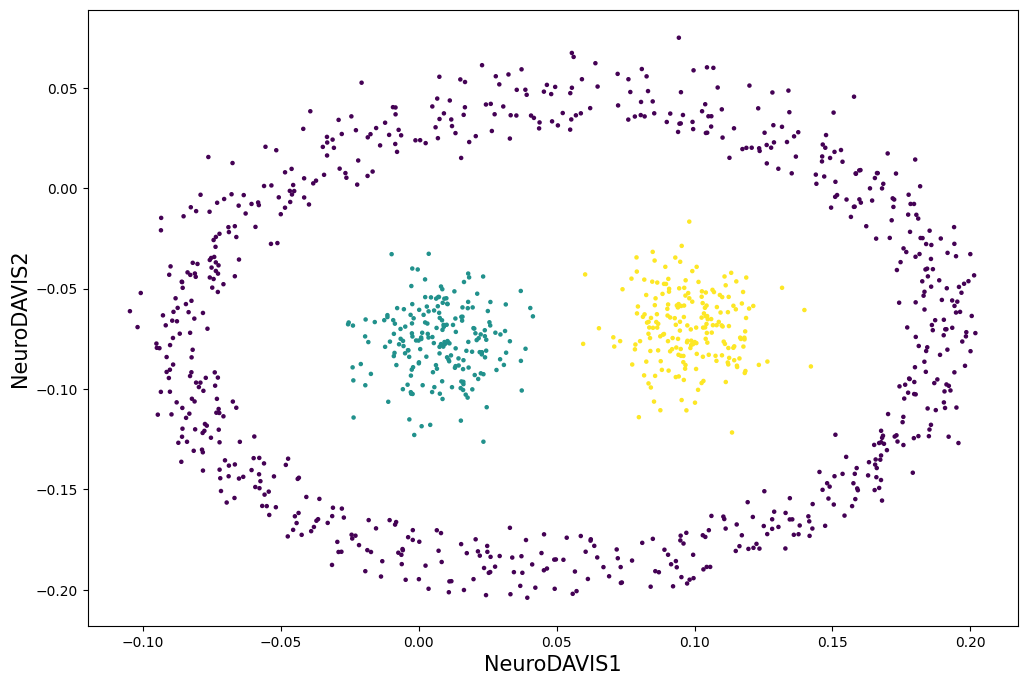

In [5]:
plt.figure(figsize=(12,8))
plt.scatter(X_embedding[:,0],X_embedding[:,1],c=y,s=5)
plt.xlabel("NeuroDAVIS1", fontsize=15)
plt.ylabel("NeuroDAVIS2", fontsize=15)
#plt.show()
plt.savefig(dir+'EllipticRing_NeuroDAVIS.eps', dpi = 300, format = 'eps')

# Spearman correlation

In [6]:
iteration = 10
score1 = []
dist_orig = np.square(euclidean_distances(X, X)).flatten()
for i in range(iteration):
    neuroDAVIS, Low = nd.NeuroDAVIS(data, X, dim=2, lambda_act=0.0001, lambda_weight=0.001, num_neuron=[10,6], bs=16, epoch=500, sd=0, verbose=0)
    X_embedding = Low.predict(data)
    dist_method = np.square(euclidean_distances(X_embedding, X_embedding)).flatten()
    score1.append(DA.correlation(dist_orig, dist_method))
#print(score1)

# Projecting data into high dimension and applying NeuroDAVIS
Using projection: $(x,y) \rightarrow (x+y,x-y,xy,x^2,y^2,x^2y,xy^2,x^3,y^3)$

In [7]:
X_9D = Convert(X)
neuroDAVIS, Low = nd.NeuroDAVIS(data, X_9D, dim=2, lambda_act=0.0001, lambda_weight=0.001, num_neuron=[20,15], bs=16, epoch=500, sd=0, verbose=1)
X_embedding = Low.predict(data)

Epoch 1/500
69/69 [==============================] - 0s 1ms/step - loss: 27.4803
Epoch 2/500
69/69 [==============================] - 0s 1ms/step - loss: 26.6159
Epoch 3/500
69/69 [==============================] - 0s 1ms/step - loss: 25.8355
Epoch 4/500
69/69 [==============================] - 0s 1ms/step - loss: 25.4261
Epoch 5/500
69/69 [==============================] - 0s 1ms/step - loss: 25.0997
Epoch 6/500
69/69 [==============================] - 0s 1ms/step - loss: 24.7503
Epoch 7/500
69/69 [==============================] - 0s 1ms/step - loss: 24.2705
Epoch 8/500
69/69 [==============================] - 0s 1ms/step - loss: 23.5765
Epoch 9/500
69/69 [==============================] - 0s 1ms/step - loss: 22.5164
Epoch 10/500
69/69 [==============================] - 0s 1ms/step - loss: 21.0442
Epoch 11/500
69/69 [==============================] - 0s 1ms/step - loss: 19.0089
Epoch 12/500
69/69 [==============================] - 0s 1ms/step - loss: 16.2002
Epoch 13/500
69/69 [=====

Epoch 102/500
69/69 [==============================] - 0s 1ms/step - loss: 1.4003
Epoch 103/500
69/69 [==============================] - 0s 967us/step - loss: 1.3841
Epoch 104/500
69/69 [==============================] - 0s 1ms/step - loss: 1.3707
Epoch 105/500
69/69 [==============================] - 0s 1ms/step - loss: 1.3501
Epoch 106/500
69/69 [==============================] - 0s 1ms/step - loss: 1.3336
Epoch 107/500
69/69 [==============================] - 0s 952us/step - loss: 1.3126
Epoch 108/500
69/69 [==============================] - 0s 1ms/step - loss: 1.2965
Epoch 109/500
69/69 [==============================] - 0s 1ms/step - loss: 1.2755
Epoch 110/500
69/69 [==============================] - 0s 1ms/step - loss: 1.2612
Epoch 111/500
69/69 [==============================] - 0s 922us/step - loss: 1.2437
Epoch 112/500
69/69 [==============================] - 0s 999us/step - loss: 1.2254
Epoch 113/500
69/69 [==============================] - 0s 1ms/step - loss: 1.2112
Epoch 11

69/69 [==============================] - 0s 1ms/step - loss: 0.5091
Epoch 301/500
69/69 [==============================] - 0s 1ms/step - loss: 0.5100
Epoch 302/500
69/69 [==============================] - 0s 922us/step - loss: 0.5079
Epoch 303/500
69/69 [==============================] - 0s 996us/step - loss: 0.5044
Epoch 304/500
69/69 [==============================] - 0s 1ms/step - loss: 0.5046
Epoch 305/500
69/69 [==============================] - 0s 1ms/step - loss: 0.5067
Epoch 306/500
69/69 [==============================] - 0s 987us/step - loss: 0.5036
Epoch 307/500
69/69 [==============================] - 0s 1ms/step - loss: 0.5032
Epoch 308/500
69/69 [==============================] - 0s 1ms/step - loss: 0.5021
Epoch 309/500
69/69 [==============================] - 0s 971us/step - loss: 0.5038
Epoch 310/500
69/69 [==============================] - 0s 1ms/step - loss: 0.5034
Epoch 311/500
69/69 [==============================] - 0s 1ms/step - loss: 0.4997
Epoch 312/500
69/69 [=

69/69 [==============================] - 0s 1ms/step - loss: 0.3961
Epoch 499/500
69/69 [==============================] - 0s 1ms/step - loss: 0.3967
Epoch 500/500
35/35 [==============================] - 0s 868us/step


# Plotting the results

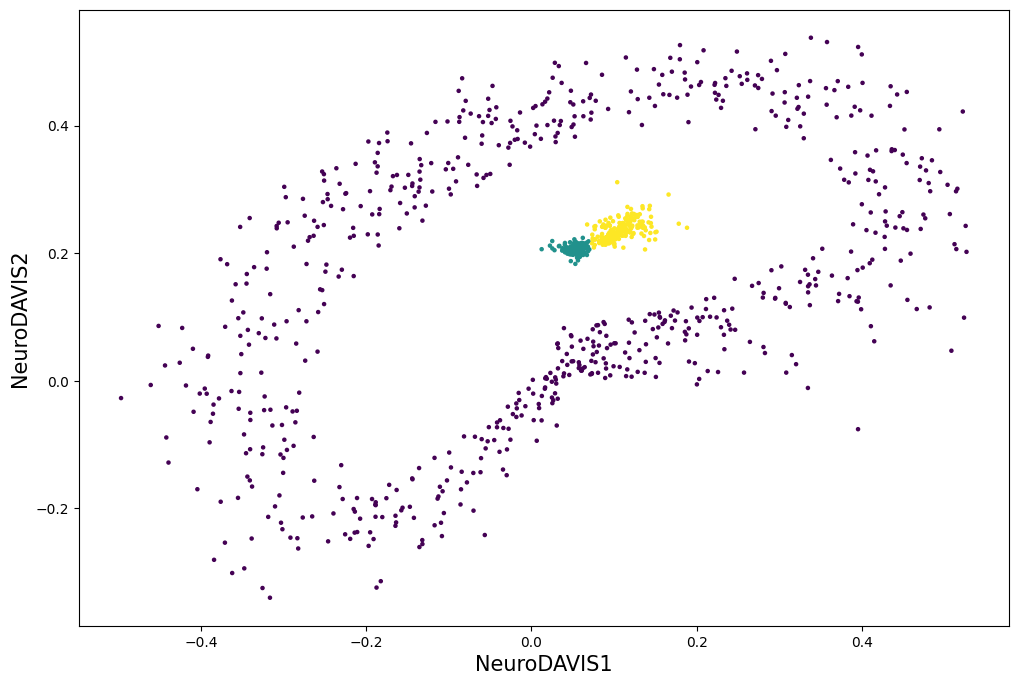

In [8]:
plt.figure(figsize=(12,8))
plt.scatter(X_embedding[:,0],X_embedding[:,1],c=y,s=5)
plt.xlabel("NeuroDAVIS1", fontsize=15)
plt.ylabel("NeuroDAVIS2", fontsize=15)
#plt.show()
plt.savefig(dir+'EllipticRing_NeuroDAVIS_2D_9D_2D.eps', dpi = 300, format = 'eps')

# Spearman correlation

In [9]:
iteration = 10
score2 = []
dist_orig = np.square(euclidean_distances(X_9D, X_9D)).flatten()
for i in range(iteration):
    neuroDAVIS, Low = nd.NeuroDAVIS(data, X_9D, dim=2, lambda_act=0.0001, lambda_weight=0.001, num_neuron=[20,15], bs=16, epoch=500, sd=0, verbose=0)
    X_embedding = Low.predict(data)
    dist_method = np.square(euclidean_distances(X_embedding, X_embedding)).flatten()
    score2.append(DA.correlation(dist_orig, dist_method))
#print(score2)